In [1]:
# !conda activate tensorflow
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

In [2]:
# options = {
#     'model' : 'cfg/yolo.cfg',
#     'load' : 'bin/yolov2.weights',
#     'threshold' : 0.3,
#     'gpu' : 1.0
# }
options = {
    'model' : 'cfg/tiny-yolo-voc-1c.cfg',
    'load' : 750,
    'threshold' : 0.3,
    'gpu' : 1.0
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-1c.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 256)
 Init  |

In [15]:
img = cv2.imread('DSCF3532.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
results = tfnet.return_predict(img)

img.shape

(4608, 3456, 3)

In [16]:
results

[{'bottomright': {'x': 2169, 'y': 2790},
  'confidence': 0.79457176,
  'label': 'grain',
  'topleft': {'x': 1844, 'y': 1865}}]

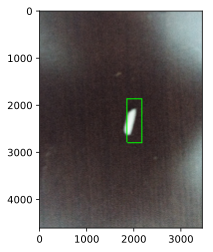

In [17]:
# tl = (results[0]['topleft']['x'], results[0]['topleft']['y'])
# br = (results[0]['bottomright']['x'], results[0]['bottomright']['y'])
# label = results[0]['label']
# plt.imshow(img)
# plt.show()
colors = [tuple(255 * np.random.randn(3)) for i in range(5)]
for result in results:
        tl = (result['topleft']['x'], result['topleft']['y'])
        br = (result['bottomright']['x'], result['bottomright']['y'])
        label = result['label']
        img = cv2.rectangle(img, tl, br, (0, 255, 0), 20)
        img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_SIMPLEX,
                                1, (0, 0, 0), 2, cv2.LINE_AA)
plt.imshow(img)
# plt.show()

In [ ]:
# img = cv2.rectangle(img, tl, br, (0, 255, 0), 3)
# img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
# plt.imshow(img)
# plt.show()